# Tutorial 2

This script accompanies the Tutorial 2 presentation from class.  There are four examples of applying multiple linear regression and stepwise regression

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
import itertools

In [13]:
#run stepwise regression function
%run ./Tutorial_2_2021_functions.ipynb

## Example 1: Testing MLR on artificial data
Y = a0 + a1*X1 + a2*X2 + a3*X3 + a4*X4

In [3]:
#load X data and look at the first few rows
X = pd.read_csv('Xdata.csv',names=['X1','X2','X3','X4'])
X1 = X['X1']
X2 = X['X2']
X3 = X['X3']
X4 = X['X4']
X.head()

,X1,X2,X3,X4
0,50,61,49,94
1,96,27,34,88
2,35,66,91,56
3,59,69,37,63
4,23,75,12,59


In [4]:
#define regression coefficients, and calculate Y
a0 = 0
a1 = 1
a2 = -2
a3 = 3
a4 = -4

Y = a0 + a1*X1 + a2*X2 + a3*X3 + a4*X4

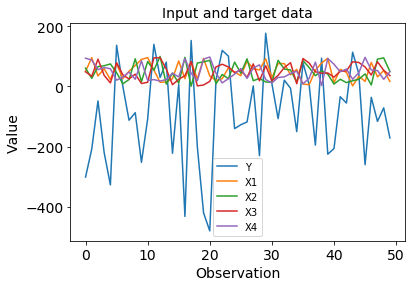

In [5]:
#plot X and Y

saveIt = 0

fs = 14
plt.subplot(111)
plt.plot(Y)
plt.plot(X)
plt.legend(['Y','X1','X2','X3','X4'])
plt.xlabel('Observation', fontsize = fs)
plt.ylabel('Value', fontsize = fs)
plt.title('Input and target data', fontsize = fs)
plt.tick_params(labelsize = fs)

if saveIt:
    plt.savefig('example1_fig1.png', dpi = 300, bbox_inches = 'tight')

plt.show()

In [6]:
#apply MLR on X and Y to see if this method can recover the known coefficients

lm_MLR = linear_model.LinearRegression()
model = lm_MLR.fit(X,Y)
ypred_MLR = lm_MLR.predict(X) #y predicted by MLR
intercept_MLR = lm_MLR.intercept_ #intercept predicted by MLR
coef_MLR = lm_MLR.coef_ #regression coefficients in MLR model
R2_MLR = lm_MLR.score(X,Y) #R-squared value from MLR model

print('MLR results:')
print('a0 = ' + str(intercept_MLR))
print('a1 = ' + str(coef_MLR[0]))
print('a2 = ' + str(coef_MLR[1]))
print('a3 = ' + str(coef_MLR[2]))
print('a4 = ' + str(coef_MLR[3]))



MLR results:
a0 = 1.1368683772161603e-13
a1 = 1.0000000000000002
a2 = -2.0000000000000027
a3 = 3.0
a4 = -4.0


In [14]:
#now, use stepwise regression to find which predictors to use

result = stepwise_selection(X, Y)

print('resulting features:')
print(result)

X4 []
Add  X4                             with p-value 1.96607e-11
X3 ['X4']
Add  X3                             with p-value 4.6339e-09
X2 ['X4', 'X3']
Add  X2                             with p-value 1.94203e-20
X1 ['X4', 'X3', 'X2']
Add  X1                             with p-value 0.0
resulting features:
['X4', 'X3', 'X2', 'X1']


/Users/samanderson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


In [8]:
#do MLR using predictors chosen from stepwise regression

lm_step = linear_model.LinearRegression()
model_step = lm_step.fit(X[result],Y)
ypred_step = lm_step.predict(X[result]) #y predicted by MLR
intercept_step = lm_step.intercept_ #intercept predicted by MLR
coef_step = lm_step.coef_ #regression coefficients in MLR model
R2_step = lm_step.score(X[result],Y) #R-squared value from MLR model


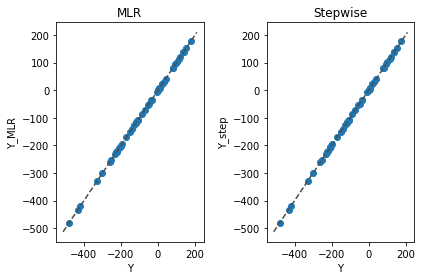

In [9]:
#visualize MLR and stepwise model performance

ax1 = plt.subplot(121)
ax1.scatter(Y,ypred_MLR)
l1 = np.min(ax1.get_xlim())
l2 = np.max(ax1.get_xlim())
ax1.plot([l1,l2], [l1,l2], ls="--", c=".3")
plt.xlabel('Y')
plt.ylabel('Y_MLR')
plt.title('MLR')

ax2 = plt.subplot(122)
ax2.scatter(Y,ypred_step)
l1 = np.min(ax2.get_xlim())
l2 = np.max(ax2.get_xlim())
ax2.plot([l1,l2], [l1,l2], ls="--", c=".3")
plt.xlabel('Y')
plt.ylabel('Y_step')
plt.title('Stepwise')

plt.tight_layout()
plt.show()

# Example 2
Y = a0 + a1*X1 + a2*X2 + a3*X3 + a4*X4 + Yrand

Add some random noise to Y and rerun MLR/stepwise

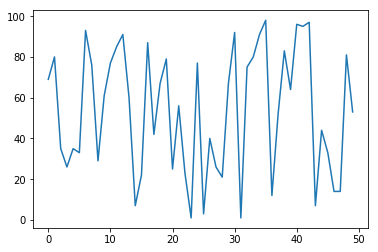

In [10]:
#load Yrand and check it out
Yrand = pd.read_csv('Yrand.csv',header=None)[0]
Ynew = Y + 5*Yrand

plt.plot(Yrand)
plt.show()

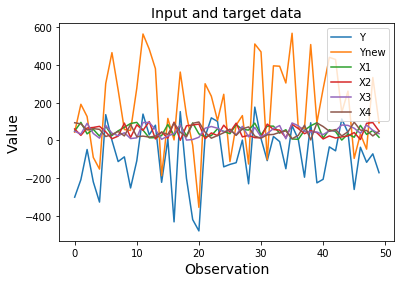

In [11]:
# plot Y, Ynew, and X

saveIt = 0

plt.subplot()
plt.plot(Y)
plt.plot(Ynew)
plt.plot(X)
plt.legend(['Y','Ynew','X1','X2','X3','X4'])
plt.xlabel('Observation', fontsize = fs)
plt.ylabel('Value', fontsize = fs)
plt.title('Input and target data', fontsize = fs)

if saveIt:
    plt.savefig('example1_fig2.png', dpi = 300, bbox_inches = 'tight')

plt.show()

In [12]:
#now: MLR

lm_MLR = linear_model.LinearRegression()
model = lm_MLR.fit(X,Ynew)
ypred_MLR = lm_MLR.predict(X) #y predicted by MLR
intercept_MLR = lm_MLR.intercept_ #intercept predicted by MLR
coef_MLR = lm_MLR.coef_ #regression coefficients in MLR model
R2_MLR = lm_MLR.score(X,Ynew) #R-squared value from MLR model

print('MLR results:')
print('a0 = ' + str(intercept_MLR))
print('a1 = ' + str(coef_MLR[0]))
print('a2 = ' + str(coef_MLR[1]))
print('a3 = ' + str(coef_MLR[2]))
print('a4 = ' + str(coef_MLR[3]))

MLR results:
a0 = 311.33892044632
a1 = 1.0297744038862915
a2 = -2.0570869420780595
a3 = 2.4549509246271173
a4 = -4.341338235550949


In [13]:
#now: stepwise, and then MLR with kept predictors

result = stepwise_selection(X, Ynew,threshold_in=0.05,threshold_out=0.1)

print('resulting features:')
print(result)

lm_step = linear_model.LinearRegression()
model_step = lm_step.fit(X[result],Ynew)
ypred_step = lm_step.predict(X[result]) #y predicted by MLR
intercept_step = lm_step.intercept_ #intercept predicted by MLR
coef_step = lm_step.coef_ #regression coefficients in MLR model
R2_step = lm_step.score(X[result],Ynew) #R-squared value from MLR model


Add  X4                             with p-value 8.3401e-06
Add  X2                             with p-value 0.0088294
Add  X3                             with p-value 0.0195409
resulting features:
['X4', 'X2', 'X3']


/Users/samanderson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


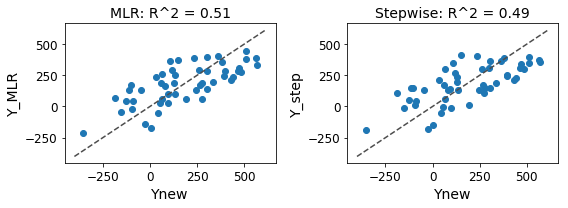

In [14]:

saveIt = 0

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (8,3))

axes[0].scatter(Ynew,ypred_MLR)
l1 = np.min(axes[0].get_xlim())
l2 = np.max(axes[0].get_xlim())
axes[0].plot([l1,l2], [l1,l2], ls="--", c=".3")
axes[0].set_xlabel('Ynew', fontsize = fs)
axes[0].set_ylabel('Y_MLR', fontsize = fs)
axes[0].set_title('MLR: R^2 = ' + str(R2_MLR)[:4], fontsize = fs)
axes[0].tick_params(labelsize = fs-2)

axes[1].scatter(Ynew,ypred_step)
l1 = np.min(axes[1].get_xlim())
l2 = np.max(axes[1].get_xlim())
axes[1].plot([l1,l2], [l1,l2], ls="--", c=".3")
axes[1].set_xlabel('Ynew', fontsize = fs)
axes[1].set_ylabel('Y_step', fontsize = fs)
axes[1].set_title('Stepwise: R^2 = ' + str(R2_step)[:4], fontsize = fs)
axes[1].tick_params(labelsize = fs-2)

plt.tight_layout()

if saveIt:
    plt.savefig('example2_fig1.png', dpi = 300, bbox_inches = 'tight')

plt.show()

option 2:
perfroming MLR with all combinations of predictors on one part of the data (calibration sample); use another part of the data (validation sample) for finding the best model according to R2 (or p-values). The best model = the one with smallest p-value over the validation sample

calibration sample: first 25 observations
validation sample: the rest

set arrey from 1 to the total number of predictors (i.e. 4)

In [15]:
#goal: loop through every combination of normalized predictors, make linear model, and find one with best performance

R2_best = []
combo_best = []

for kk in range(1,5): #for each total number of predictors to use in model (from 1 predictor to 9 predictors)
    
    v0 = range(np.shape(X)[1])
    combinations = list(itertools.combinations(range(np.shape(X)[1]),kk)) #all possible combinations of kk total predictors 
    R2_test = []
    
    for ind in range(len(combinations)): #for each combination of predictors, make MLR model and compute R^2

        test_vars = np.array(combinations[ind])
        X_test = X.iloc[:25,test_vars]
        Y_test = Ynew.iloc[:25]
        
        X_valid = X.iloc[25:,test_vars]
        Y_valid = Ynew.iloc[25:]

        lm_test = linear_model.LinearRegression()
        model_test = lm_test.fit(X_test,Y_test)
        ypred_test = lm_test.predict(X_test) #y predicted by MLR
        R2_test.append(lm_test.score(X_valid,Y_valid)) #R-squared value from MLR model

    R2_best.append(np.max(R2_test))
    combo_best.append(combinations[np.argmax(R2_test)])
    
R2_best_final = np.max(R2_best)
combo_best_final = combo_best[np.argmax(R2_best)]

print('The best combination of predictors is: ' )
print(list(X.columns[np.asarray(combo_best_final)]))

The best combination of predictors is: 
['X1', 'X2', 'X4']


In [16]:
#make linear model out of best predictors

X_calib_valid = X.iloc[:,np.asarray(combo_best_final)]

lm_calib_valid = linear_model.LinearRegression()
model_calib_valid = lm_calib_valid.fit(X_calib_valid,Ynew)
ypred_calib_valid = lm_calib_valid.predict(X_calib_valid) #y predicted by MLR
intercept_calib_valid = lm_calib_valid.intercept_ #intercept predicted by MLR
coef_calib_valid = lm_calib_valid.coef_ #regression coefficients in MLR model
R2_calib_valid = lm_calib_valid.score(X_calib_valid,Ynew) #R-squared value from MLR model



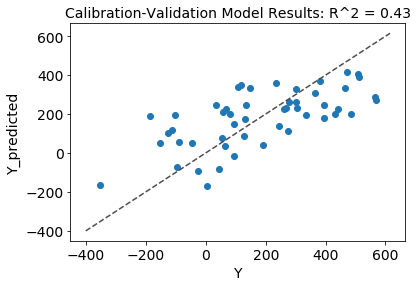

In [17]:
#visualize calibration-validation model performance

saveIt = 0

ax = plt.subplot(111)
ax.scatter(Ynew,ypred_calib_valid)
l1 = np.min(ax.get_xlim())
l2 = np.max(ax.get_xlim())
ax.plot([l1,l2], [l1,l2], ls="--", c=".3")
plt.xlabel('Y', fontsize = fs)
plt.ylabel('Y_predicted', fontsize = fs)
plt.title('Calibration-Validation Model Results: R^2 = ' + str(R2_calib_valid)[:4], fontsize = fs)
plt.tick_params(labelsize = fs)

if saveIt:
    plt.savefig('example2_fig2.png', dpi = 300, bbox_inches = 'tight')
    
plt.show()

## Example 3

Again, do MLR and stepwise, but with different coefficients

In [18]:
#new coefficients, new Y
a0 = 0
a1 = 4
a2 = -3
a3 = 2
a4 = -1

Y = a0 + a1*X1 + a2*X2 + a3*X3 + a4*X4
Ynew = Y + 5*Yrand

In [19]:
#now: MLR, stepwise, and then MLR with kept predictors

#MLR
lm_MLR = linear_model.LinearRegression()
model = lm_MLR.fit(X,Ynew)
ypred_MLR = lm_MLR.predict(X) #y predicted by MLR
intercept_MLR = lm_MLR.intercept_ #intercept predicted by MLR
coef_MLR = lm_MLR.coef_ #regression coefficients in MLR model
R2_MLR = lm_MLR.score(X,Ynew) #R-squared value from MLR model

print('MLR results:')
print('a0 = ' + str(intercept_MLR))
print('a1 = ' + str(coef_MLR[0]))
print('a2 = ' + str(coef_MLR[1]))
print('a3 = ' + str(coef_MLR[2]))
print('a4 = ' + str(coef_MLR[3]))
print('')

#stepwise
print('Stepwise results:')
result = stepwise_selection(X, Ynew,threshold_in=0.05,threshold_out=0.1)

print('Resulting features:')
print(result)

lm_step = linear_model.LinearRegression()
model_step = lm_step.fit(X[result],Ynew)
ypred_step = lm_step.predict(X[result]) #y predicted by MLR
intercept_step = lm_step.intercept_ #intercept predicted by MLR
coef_step = lm_step.coef_ #regression coefficients in MLR model
R2_step = lm_step.score(X[result],Ynew) #R-squared value from MLR model


MLR results:
a0 = 311.33892044632
a1 = 4.029774403886292
a2 = -3.0570869420780578
a3 = 1.4549509246271157
a4 = -1.3413382355509498

Stepwise results:
Add  X1                             with p-value 0.000431949
Add  X2                             with p-value 0.000336855
Add  X3                             with p-value 0.0455512
Resulting features:
['X1', 'X2', 'X3']


/Users/samanderson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


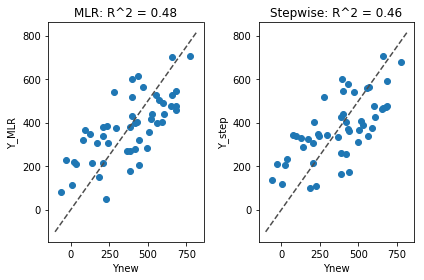

In [20]:
#visualize

ax1 = plt.subplot(121)
ax1.scatter(Ynew,ypred_MLR)
l1 = np.min(ax1.get_xlim())
l2 = np.max(ax1.get_xlim())
ax1.plot([l1,l2], [l1,l2], ls="--", c=".3")
plt.xlabel('Ynew')
plt.ylabel('Y_MLR')
plt.title('MLR: R^2 = ' + str(R2_MLR)[:4])

ax2 = plt.subplot(122)
ax2.scatter(Ynew,ypred_step)
l1 = np.min(ax2.get_xlim())
l2 = np.max(ax2.get_xlim())
ax2.plot([l1,l2], [l1,l2], ls="--", c=".3")
plt.xlabel('Ynew')
plt.ylabel('Y_step')
plt.title('Stepwise: R^2 = ' + str(R2_step)[:4])

plt.tight_layout()
plt.show()

## Example 4

Scale up X4

In [21]:
X4new = 100 + 10*X4
X['X4'] = X4new

Y = a0 + a1*X1 + a2*X2 + a3*X3 + a4*X4new
Ynew = Y + 5*Yrand

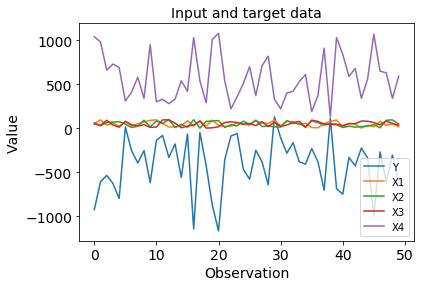

In [22]:
#plot X and Y

saveIt = 0

fs = 14
plt.subplot(111)
plt.plot(Y)
plt.plot(X)
plt.legend(['Y','X1','X2','X3','X4'])
plt.xlabel('Observation', fontsize = fs)
plt.ylabel('Value', fontsize = fs)
plt.title('Input and target data', fontsize = fs)
plt.tick_params(labelsize = fs)

if saveIt:
    plt.savefig('example4_fig1.png', dpi = 300, bbox_inches = 'tight')

plt.show()

In [23]:
#MLR, stepwise, and then MLR with kept predictors

#MLR
lm_MLR = linear_model.LinearRegression()
model = lm_MLR.fit(X,Ynew)
ypred_MLR = lm_MLR.predict(X) #y predicted by MLR
intercept_MLR = lm_MLR.intercept_ #intercept predicted by MLR
coef_MLR = lm_MLR.coef_ #regression coefficients in MLR model
R2_MLR = lm_MLR.score(X,Ynew) #R-squared value from MLR model

print('MLR results:')
print('a0 = ' + str(intercept_MLR))
print('a1 = ' + str(coef_MLR[0]))
print('a2 = ' + str(coef_MLR[1]))
print('a3 = ' + str(coef_MLR[2]))
print('a4 = ' + str(coef_MLR[3]))
print('')

#stepwise
print('Stepwise results:')
result = stepwise_selection(X, Ynew,threshold_in=0.05,threshold_out=0.1)

print('Resulting features:')
print(result)

lm_step = linear_model.LinearRegression()
model_step = lm_step.fit(X[result],Ynew)
ypred_step = lm_step.predict(X[result]) #y predicted by MLR
intercept_step = lm_step.intercept_ #intercept predicted by MLR
coef_step = lm_step.coef_ #regression coefficients in MLR model
R2_step = lm_step.score(X[result],Ynew) #R-squared value from MLR model


MLR results:
a0 = 314.7523028018298
a1 = 4.02977440388629
a2 = -3.0570869420780595
a3 = 1.4549509246271168
a4 = -1.0341338235550952

Stepwise results:
Add  X4                             with p-value 1.66666e-11
Add  X1                             with p-value 0.000236063
Add  X2                             with p-value 0.000179307
Resulting features:
['X4', 'X1', 'X2']


/Users/samanderson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


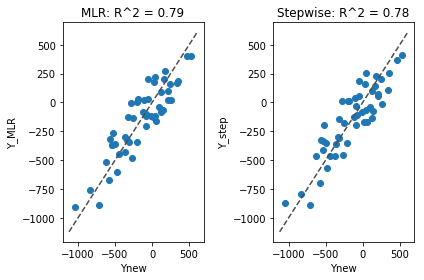

In [24]:
#visualize

ax1 = plt.subplot(121)
ax1.scatter(Ynew,ypred_MLR)
l1 = np.min(ax1.get_xlim())
l2 = np.max(ax1.get_xlim())
ax1.plot([l1,l2], [l1,l2], ls="--", c=".3")
plt.xlabel('Ynew')
plt.ylabel('Y_MLR')
plt.title('MLR: R^2 = ' + str(R2_MLR)[:4])

ax2 = plt.subplot(122)
ax2.scatter(Ynew,ypred_step)
l1 = np.min(ax2.get_xlim())
l2 = np.max(ax2.get_xlim())
ax2.plot([l1,l2], [l1,l2], ls="--", c=".3")
plt.xlabel('Ynew')
plt.ylabel('Y_step')
plt.title('Stepwise: R^2 = ' + str(R2_step)[:4])

plt.tight_layout()
plt.show()

In [25]:
# standardize X and redo the analysis

Xnorm = (X - X.mean())/X.std()

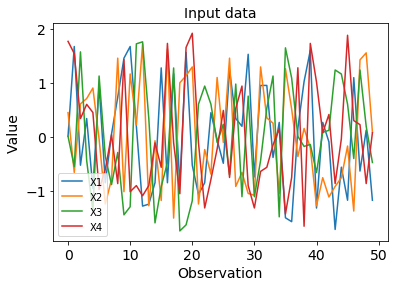

In [26]:
#plot X and Y

saveIt = 0

fs = 14
plt.subplot(111)
# plt.plot(Y)
plt.plot(Xnorm)
plt.legend(['X1','X2','X3','X4'])
plt.xlabel('Observation', fontsize = fs)
plt.ylabel('Value', fontsize = fs)
plt.title('Input data', fontsize = fs)
plt.tick_params(labelsize = fs)

if saveIt:
    plt.savefig('example4_fig2.png', dpi = 300, bbox_inches = 'tight')

plt.show()

In [27]:
#MLR, stepwise, and then MLR with kept predictors

#MLR
lm_MLR = linear_model.LinearRegression()
model = lm_MLR.fit(Xnorm,Ynew)
ypred_MLR = lm_MLR.predict(Xnorm) #y predicted by MLR
intercept_MLR = lm_MLR.intercept_ #intercept predicted by MLR
coef_MLR = lm_MLR.coef_ #regression coefficients in MLR model
R2_MLR = lm_MLR.score(Xnorm,Ynew) #R-squared value from MLR model

print('MLR results:')
print('a0 = ' + str(intercept_MLR))
print('a1 = ' + str(coef_MLR[0]))
print('a2 = ' + str(coef_MLR[1]))
print('a3 = ' + str(coef_MLR[2]))
print('a4 = ' + str(coef_MLR[3]))
print('')

#stepwise
print('Stepwise results:')
result = stepwise_selection(Xnorm, Ynew,threshold_in=0.05,threshold_out=0.1)

print('Resulting features:')
print(result)

lm_step = linear_model.LinearRegression()
model_step = lm_step.fit(Xnorm[result],Ynew)
ypred_step = lm_step.predict(Xnorm[result]) #y predicted by MLR
intercept_step = lm_step.intercept_ #intercept predicted by MLR
coef_step = lm_step.coef_ #regression coefficients in MLR model
R2_step = lm_step.score(Xnorm[result],Ynew) #R-squared value from MLR model


MLR results:
a0 = -148.32000000000002
a1 = 111.9256507086993
a2 = -94.02572830699525
a3 = 39.09744411067389
a4 = -275.1809764988346

Stepwise results:
Add  X4                             with p-value 1.66666e-11
Add  X1                             with p-value 0.000236063
Add  X2                             with p-value 0.000179307
Resulting features:
['X4', 'X1', 'X2']


/Users/samanderson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


## Example 5: Real Data!

Use MLR and stepwise regression to predict crime rate from list of predictors

In [28]:
# data from: http://environmentalcomputing.net/linear-regression/
data = pd.read_csv('Plant_height.csv')
data.head()

,sort_number,site,Genus_species,Family,growthform,height,loght,Country,Site,lat,...,rain.wetm,rain.drym,rain.seas,rain.wetqr,rain.dryqr,rain.warmqr,rain.coldqr,LAI,NPP,hemisphere
0,1402,193,Acer_macryophyllum,Sapindaceae,Tree,28.0,1.447158,USA,Oregon - McDun,44.600,...,217,13,69,601,68,75,560,2.51,572.0,1
1,25246,103,Quararibea_cordata,Malvaceae,Tree,26.6,1.424882,Peru,Manu,12.183,...,416,99,45,1177,340,928,359,4.26,1405.0,-1
2,11648,54,Eragrostis_dielsii,Poaceae,Herb,0.3,-0.522879,Australia,Central Australia,23.800,...,37,9,42,109,35,109,42,1.32,756.0,-1
3,8168,144,Cistus_salvifolius,Cistaceae,Shrub,1.6,0.204120,Israel,Hanadiv,32.555,...,159,0,115,408,0,2,408,1.01,359.0,1
4,22422,178,Phlox_bifida,Polemoniaceae,Herb,0.2,-0.698970,USA,Indiana Dunes,41.617,...,104,44,23,299,165,299,165,3.26,1131.0,1


In [29]:
data.columns, data.shape

(Index(['sort_number', 'site', 'Genus_species', 'Family', 'growthform',
        'height', 'loght', 'Country', 'Site', 'lat', 'long', 'entered.by',
        'alt', 'temp', 'diurn.temp', 'isotherm', 'temp.seas', 'temp.max.warm',
        'temp.min.cold', 'temp.ann.range', 'temp.mean.wetqr', 'temp.mean.dryqr',
        'temp.mean.warmqr', 'temp.mean.coldqr', 'rain', 'rain.wetm',
        'rain.drym', 'rain.seas', 'rain.wetqr', 'rain.dryqr', 'rain.warmqr',
        'rain.coldqr', 'LAI', 'NPP', 'hemisphere'],
       dtype='object'), (178, 35))

In [30]:
y = np.log(data['height']) #predict: log of plant height
X = data[['lat', 'long', 'temp', 'temp.max.warm','temp.min.cold', 'rain', 'rain.wetm','rain.drym']] #predictors: select characteristics

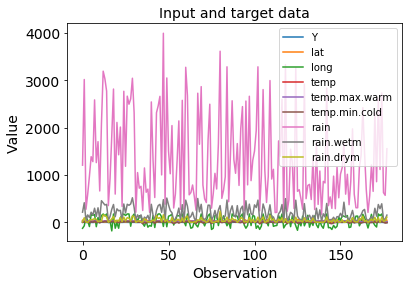

In [31]:
#plot X and Y

saveIt = 0

fs = 14
plt.subplot(111)
plt.plot(y)
plt.plot(X)
plt.legend(['Y']+list(X.columns))
plt.xlabel('Observation', fontsize = fs)
plt.ylabel('Value', fontsize = fs)
plt.title('Input and target data', fontsize = fs)
plt.tick_params(labelsize = fs)

if saveIt:
    plt.savefig('example5_fig1.png', dpi = 300, bbox_inches = 'tight')

plt.show()

In [32]:
#MLR, stepwise, and MLR with kept predictors: NOT STANDARDIZED

#MLR
lm_MLR = linear_model.LinearRegression()
model = lm_MLR.fit(X,y)
ypred_MLR = lm_MLR.predict(X) #y predicted by MLR
intercept_MLR = lm_MLR.intercept_ #intercept predicted by MLR
coef_MLR = lm_MLR.coef_ #regression coefficients in MLR model
R2_MLR = lm_MLR.score(X,y) #R-squared value from MLR model

print('MLR results:')
print('a0 = ' + str(intercept_MLR))
print('a1 = ' + str(coef_MLR[0]))
print('a2 = ' + str(coef_MLR[1]))
print('a3 = ' + str(coef_MLR[2]))
print('a4 = ' + str(coef_MLR[3]))
print('')

#stepwise
print('Stepwise results:')
result = stepwise_selection(X, y,threshold_in=0.05,threshold_out=0.1)

print('Resulting features:')
print(result)

lm_step = linear_model.LinearRegression()
model_step = lm_step.fit(X[result],y)
ypred_step = lm_step.predict(X[result]) #y predicted by MLR
intercept_step = lm_step.intercept_ #intercept predicted by MLR
coef_step = lm_step.coef_ #regression coefficients in MLR model
R2_step = lm_step.score(X[result],y) #R-squared value from MLR model


MLR results:
a0 = -2.944987772418105
a1 = 0.007711311650711829
a2 = 0.002418620901562979
a3 = -0.11034193394905699
a4 = 0.1484939483643021

Stepwise results:
Add  temp.min.cold                  with p-value 1.41181e-12
Add  rain                           with p-value 0.0015719
Add  temp.max.warm                  with p-value 0.00434164
Drop temp.min.cold                  with p-value 0.448162
Resulting features:
['rain', 'temp.max.warm']


/Users/samanderson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
/Users/samanderson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


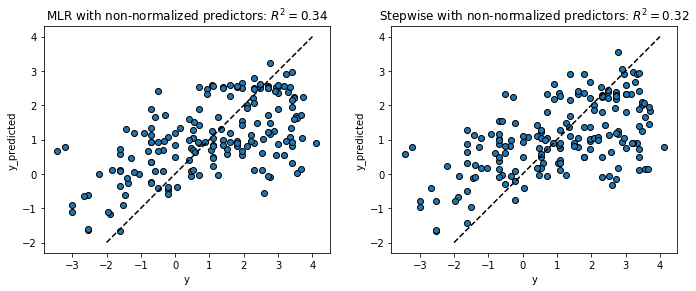

In [33]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))

axes[0].scatter(y, ypred_MLR, edgecolor = 'k')
axes[0].plot([-2,4],[-2,4],'k--')
axes[0].set_xlabel('y')
axes[0].set_ylabel('y_predicted')
axes[0].set_title('MLR with non-normalized predictors: $R^2 = $' + str(np.round(R2_MLR, decimals = 2)))
axes[0].set_aspect('equal')

axes[1].scatter(y, ypred_step, edgecolor = 'k')
axes[1].plot([-2,4],[-2,4],'k--')
axes[1].set_xlabel('y')
axes[1].set_ylabel('y_predicted')
axes[1].set_title('Stepwise with non-normalized predictors: $R^2 = $' + str(np.round(R2_step, decimals = 2)))
axes[1].set_aspect('equal')

plt.tight_layout()

In [34]:
#normalize predictors so we can find out which is most important
Xnorm = (X - X.mean())/X.std()

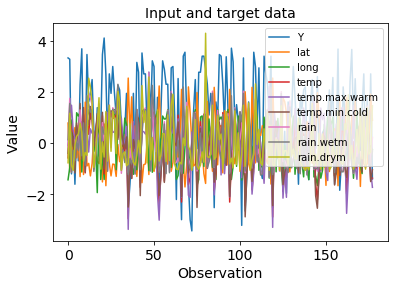

In [35]:
#plot X and Y

saveIt = 0

fs = 14
plt.subplot(111)
plt.plot(y)
plt.plot(Xnorm)
plt.legend(['Y']+list(X.columns))
plt.xlabel('Observation', fontsize = fs)
plt.ylabel('Value', fontsize = fs)
plt.title('Input and target data', fontsize = fs)
plt.tick_params(labelsize = fs)

if saveIt:
    plt.savefig('example5_fig2.png', dpi = 300, bbox_inches = 'tight')

plt.show()

In [36]:
#MLR, stepwise, and MLR with kept predictors

#MLR
lm_MLR = linear_model.LinearRegression()
model = lm_MLR.fit(Xnorm,y)
ypred_MLR = lm_MLR.predict(Xnorm) #y predicted by MLR
intercept_MLR = lm_MLR.intercept_ #intercept predicted by MLR
coef_MLR = lm_MLR.coef_ #regression coefficients in MLR model
R2_MLR = lm_MLR.score(Xnorm,y) #R-squared value from MLR model

print('MLR results:')
print('a0 = ' + str(intercept_MLR))
print('a1 = ' + str(coef_MLR[0]))
print('a2 = ' + str(coef_MLR[1]))
print('a3 = ' + str(coef_MLR[2]))
print('a4 = ' + str(coef_MLR[3]))
print('')

#stepwise
print('Stepwise results:')
result = stepwise_selection(Xnorm, y,threshold_in=0.05,threshold_out=0.1)

print('Resulting features:')
print(result)

lm_step = linear_model.LinearRegression()
model_step = lm_step.fit(Xnorm[result],y)
ypred_step = lm_step.predict(Xnorm[result]) #y predicted by MLR
intercept_step = lm_step.intercept_ #intercept predicted by MLR
coef_step = lm_step.coef_ #regression coefficients in MLR model
R2_step = lm_step.score(Xnorm[result],y) #R-squared value from MLR model


MLR results:
a0 = 1.0551986539098603
a1 = 0.1309073495878715
a2 = 0.26628797199549525
a3 = -1.0154634139785697
a4 = 0.9477220446655125

Stepwise results:
Add  temp.min.cold                  with p-value 1.41181e-12
Add  rain                           with p-value 0.0015719
Add  temp.max.warm                  with p-value 0.00434164
Drop temp.min.cold                  with p-value 0.448162
Resulting features:
['rain', 'temp.max.warm']


/Users/samanderson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
/Users/samanderson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


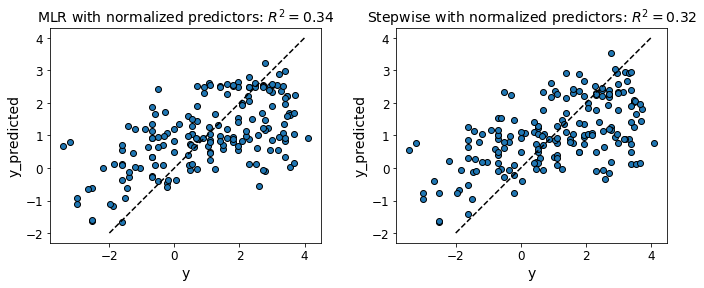

In [37]:
saveIt = 0

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))

axes[0].scatter(y, ypred_MLR, edgecolor = 'k')
axes[0].plot([-2,4],[-2,4],'k--')
axes[0].set_xlabel('y', fontsize = fs)
axes[0].set_ylabel('y_predicted', fontsize = fs)
axes[0].set_title('MLR with normalized predictors: $R^2 = $' + str(np.round(R2_MLR, decimals = 2)), fontsize = fs)
axes[0].set_aspect('equal')
axes[0].tick_params(labelsize = fs-2)

axes[1].scatter(y, ypred_step, edgecolor = 'k')
axes[1].plot([-2,4],[-2,4],'k--')
axes[1].set_xlabel('y', fontsize = fs)
axes[1].set_ylabel('y_predicted', fontsize = fs)
axes[1].set_title('Stepwise with normalized predictors: $R^2 = $' + str(np.round(R2_step, decimals = 2)), fontsize = fs)
axes[1].set_aspect('equal')
axes[1].tick_params(labelsize = fs-2)

plt.tight_layout()

if saveIt:
    plt.savefig('example5_fig3.png', dpi = 300, bbox_inches = 'tight')


In [38]:
#which predictor is most important?
print('Most important variable index for MLR: ', np.argmax(np.abs(coef_MLR)))
print('Most important variable index for stepwise: ', np.argmax(np.abs(coef_step)))
print()
print('Most important variable for MLR: ', X.columns[np.argmax(np.abs(coef_MLR))])
print('Most important variable for stepwise: ', result[np.argmax(np.abs(coef_step))])

Most important variable index for MLR:  5
Most important variable index for stepwise:  0

Most important variable for MLR:  rain
Most important variable for stepwise:  rain
